In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train= pd.read_csv('data_reviews/x_train.csv')
y_train= pd.read_csv('data_reviews/y_train.csv')

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [4]:
import math

In [5]:
import re
import nltk

In [6]:
#lower case
x_train['text_processed'] = x_train['text'].map(lambda x: x.lower())

# contractions
def contractions(s):
    s = re.sub(r"won’t", "will not",s)
    s = re.sub(r"would’t","would not",s)
    s = re.sub(r"could’t", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
x_train['text_processed'] = x_train['text_processed'].map(lambda x: contractions(x))

x_train['text_processed'] = x_train['text_processed'].map(lambda x: re.sub('[.!,\.?()0123456789:;\x85\x96\x97"#$%&()\[\]*+-/\']', '', x))

# remove non-alpha words
import nltk
x_train['text_processed'] = x_train['text_processed'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','',x) for x in nltk.word_tokenize(x)]))

# remove extra spaces
x_train['text_processed'] = x_train['text_processed'].apply(lambda x: re.sub(' +',' ', x))

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_train['1'] = x_train['text_processed'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
x_train['1'] = x_train['1'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
x_train['2'] = x_train['text_processed'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [9]:
# # count vectorizor, 'text processed'

In [10]:
a = np.logspace(-2,2,10)
a

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [11]:
# countvectorize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'logi__C':np.logspace(-2,2,10), 'logi__penalty':['l2'],'logi__max_iter':np.ceil(np.logspace(1.7,2.7, 40))}
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('logi', LogisticRegression(n_jobs = -1, solver = 'saga'))
    ]
)
grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 50, return_train_score = True)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.cv_results_)
# print(grid.best_params_)
# print(grid.best_score_)

{'logi__penalty': 'l2', 'logi__max_iter': 262.0, 'logi__C': 1.6681005372000592}
0.8066666666666666


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [12]:
a = grid.cv_results_['rank_test_score'] == 1
np.array(grid.cv_results_['params'])[a]

array([{'logi__penalty': 'l2', 'logi__max_iter': 262.0, 'logi__C': 1.6681005372000592},
       {'logi__penalty': 'l2', 'logi__max_iter': 102.0, 'logi__C': 12.915496650148826}],
      dtype=object)

array([{'logi__penalty': 'l2', 'logi__max_iter': 154.0, 'logi__C': 1.6681005372000592}],
      dtype=object)

In [13]:
param_grid = {'logi__C':np.logspace(-1,1,40), 'logi__penalty':['l2'],'logi__max_iter':np.ceil(np.logspace(1.7,2.7, 50))}

grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 100, return_train_score = True, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid.cv_results_)
print(grid.best_params_)
print(grid.best_score_)

{'mean_fit_time': array([0.19547687, 0.28224578, 0.12267208, 0.13962598, 0.14321666,
       0.11768842, 0.20185928, 0.37320118, 0.14002447, 0.25232468,
       0.20026274, 0.17413359, 0.22978511, 0.30199308, 0.1326448 ,
       0.27007675, 0.17752485, 0.19248533, 0.19308381, 0.10910778,
       0.18929343, 0.12207217, 0.44820013, 0.11249814, 0.17413383,
       0.11449323, 0.11768541, 0.17991872, 0.42027597, 0.1009294 ,
       0.13643479, 0.19128809, 0.17313652, 0.18510308, 0.12187314,
       0.14481277, 0.1551846 , 0.15897298, 0.11828141, 0.2495327 ,
       0.12107539, 0.51222987, 0.43882723, 0.16495838, 0.15837617,
       0.19747105, 0.12287087, 0.3426826 , 0.13523784, 0.20106111,
       0.20066409, 0.14182158, 0.12825551, 0.24514418, 0.11748614,
       0.17712574, 0.49806786, 0.11848202, 0.18709841, 0.14979887,
       0.11489086, 0.30897317, 0.164361  , 0.14620867, 0.11569047,
       0.16934619, 0.12067771, 0.12566338, 0.29082265, 0.20644655,
       0.51382623, 0.1178833 , 0.188695  , 0

{'logi__penalty': 'l2', 'logi__max_iter': 329.0, 'logi__C': 1.0608183551394483}
0.8099999999999999

In [14]:
param_grid = { 'logi__penalty':['l2'],'logi__max_iter':np.ceil(np.logspace(1,2.7, 150))}
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('logi', LogisticRegression(C = 1.0608183551394483, n_jobs = -1, solver = 'saga'))
    ]
)
grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 20, return_train_score = True, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid.best_params_)
print(grid.best_score_)

{'logi__penalty': 'l2', 'logi__max_iter': 476.0}
0.8099999999999999


In [15]:
def log_iter(row):
    return math.log(row['param_logi__max_iter'])

In [16]:
d = pd.DataFrame.from_dict(grid.cv_results_).sort_values(by = ['param_logi__max_iter'])
d['log_iter'] = d.apply(lambda row: log_iter(row), axis = 1)

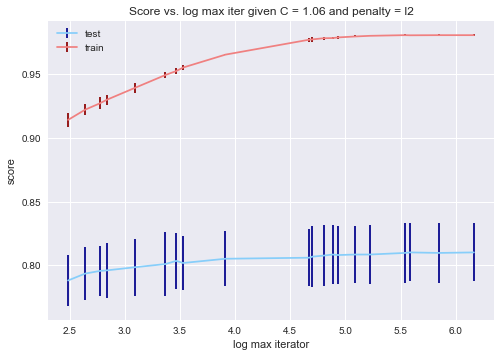

In [17]:
plt.errorbar(d['log_iter'],d['mean_test_score'], d['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
plt.errorbar(d['log_iter'],d['mean_train_score'], d['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('log max iterator')
plt.ylabel('score')
plt.title('Score vs. log max iter given C = 1.06 and penalty = l2')
plt.legend()

In [18]:
param_grid = {'logi__C':np.logspace(-2,1,100), 'logi__penalty':['l2']}
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('logi', LogisticRegression(n_jobs = -1, solver = 'saga', max_iter = 416))
    ]
)
grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 20, return_train_score = True, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid.best_params_)
print(grid.best_score_)

{'logi__penalty': 'l2', 'logi__C': 1.0}
0.8083333333333332


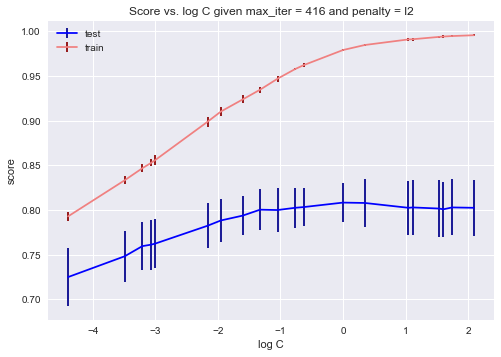

In [19]:
def logC(row):
    return math.log(row['param_logi__C'])

d = pd.DataFrame.from_dict(grid.cv_results_).sort_values(by = ['param_logi__C'])
d['log_c'] = d.apply(lambda row: logC(row), axis = 1)

plt.errorbar(d['log_c'],d['mean_test_score'], d['std_test_score'], ecolor = 'darkblue', color = 'blue', label = 'test')
plt.errorbar(d['log_c'],d['mean_train_score'], d['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('log C')
plt.ylabel('score')
plt.title('Score vs. log C given max_iter = 416 and penalty = l2')
plt.legend()